# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 25.97 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 8.5MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=d2db46fff1576e67097d3af4d036170981d1d3d3f5f877507cdf5dd242577ea5
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=d6cff57e5505569bc07bd0f53eda5f6e0a0c79822c7ba079943d3b9324124892
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [4]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2021-05-18 11:00:45--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  3.25MB/s    in 8.1s    

2021-05-18 11:00:53 (3.54 MB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/1

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2021-05-18 11:00:57--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  4.16MB/s    in 58s     

2021-05-18 11:01:55 (3.55 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [6]:
!pip install visdom
import visdom

! npm install -g localtunnel
get_ipython().system_raw('/usr/local/bin/python -m pip install visdom')
get_ipython().system_raw('/usr/local/bin/python -m visdom.server -port 6006 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')
import time
time.sleep(5)
! cat url.txt
import visdom
time.sleep(5)
vis = visdom.Visdom(port='6006')
print(vis)
time.sleep(3)
vis.text('testing')
! cat visdomlog.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.1
added 22 packages from 22 contributors in 1.53s
your url is: https://average-wasp-29.loca.lt


Setting up a new session...
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.7/http/client.py", line 1277, in request
    self._send_request(method, url, body

Exception in user code:
------------------------------------------------------------


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
Visdom python client failed to establish socket to get messages from the server. This feature is optional and can be disabled by initializing Visdom with `use_incoming_socket=False`, which will prevent waiting for this request to timeout.


[Errno 99] Cannot assign requested address


Exception in user code:
------------------------------------------------------------
/usr/bin/python2: No module named visdom


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.7/http/client.py", line 1277, in request
    self._send_request(method, url, body, headers, encode_chunked)
 

In [7]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --n_epochs_decay 5 --gan_mode wgangp --lr_policy step

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                       

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


initialize network with normal
initialize network with normal
model [Pix2PixModel] was created
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
[Network D] Total number of parameters : 2.769 M
-----------------------------------------------
Setting up a new session...
Exception in user code:
------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  Fi

[Errno 99] Cannot assign requested address


[Errno 99] Cannot assign requested address


[Errno 99] Cannot assign requested address


[Errno 99] Cannot assign requested address
Visdom python client failed to establish socket to get messages from the server. This feature is optional and can be disabled by initializing Visdom with `use_incoming_socket=False`, which will prevent waiting for this request to timeout.


Could not connect to Visdom server. 
 Trying to start a server....
Command: /usr/bin/python3 -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/facades_pix2pix/web...
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-lear

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 1, iters: 100, time: 0.170, data: 0.269) G_GAN: -1.636 G_L1: 47.403 D_real: -9.252 D_fake: 6.533 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 1, iters: 200, time: 0.170, data: 0.001) G_GAN: -2.061 G_L1: 49.126 D_real: -11.358 D_fake: 5.891 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 1, iters: 300, time: 0.170, data: 0.002) G_GAN: -15.017 G_L1: 46.215 D_real: -30.375 D_fake: 20.337 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 1, iters: 400, time: 0.334, data: 0.002) G_GAN: -10.814 G_L1: 39.274 D_real: -27.192 D_fake: 21.768 
End of epoch 1 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 2, iters: 200, time: 0.169, data: 0.002) G_GAN: -22.163 G_L1: 34.951 D_real: -27.289 D_fake: 26.338 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 2, iters: 300, time: 0.170, data: 0.006) G_GAN: -4.908 G_L1: 44.302 D_real: -41.704 D_fake: 12.793 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 2, iters: 400, time: 0.341, data: 0.002) G_GAN: -22.000 G_L1: 33.290 D_real: -25.607 D_fake: 24.122 
End of epoch 2 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be o

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 3, iters: 100, time: 0.169, data: 0.136) G_GAN: -27.399 G_L1: 36.820 D_real: -21.124 D_fake: 34.993 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 3, iters: 200, time: 0.170, data: 0.002) G_GAN: -24.092 G_L1: 41.347 D_real: -40.940 D_fake: 32.258 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 3, iters: 300, time: 0.169, data: 0.002) G_GAN: -36.370 G_L1: 41.326 D_real: -34.865 D_fake: 41.839 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 3, iters: 400, time: 0.319, data: 0.002) G_GAN: -22.448 G_L1: 37.226 D_real: -13.007 D_fake: 27.075 
End of epoch 3 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be o

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 4, iters: 100, time: 0.171, data: 0.160) G_GAN: -21.461 G_L1: 53.066 D_real: -28.421 D_fake: 29.108 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 4, iters: 200, time: 0.170, data: 0.002) G_GAN: -35.628 G_L1: 41.480 D_real: -40.092 D_fake: 41.780 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 4, iters: 300, time: 0.169, data: 0.002) G_GAN: -37.802 G_L1: 34.531 D_real: -54.488 D_fake: 45.591 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 4, iters: 400, time: 0.324, data: 0.002) G_GAN: -22.193 G_L1: 44.931 D_real: -44.648 D_fake: 29.579 
End of epoch 4 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 5, iters: 200, time: 0.169, data: 0.002) G_GAN: -2.679 G_L1: 44.790 D_real: -16.621 D_fake: 17.467 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 5, iters: 300, time: 0.168, data: 0.003) G_GAN: -71.991 G_L1: 36.207 D_real: -52.991 D_fake: 73.762 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 5, iters: 400, time: 0.336, data: 0.002) G_GAN: -77.240 G_L1: 40.171 D_real: -58.035 D_fake: 83.373 
saving the model at the end of epoch 5, iters 2000


[Errno 99] Cannot assign requested address


End of epoch 5 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tran

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 6, iters: 100, time: 0.170, data: 0.131) G_GAN: -56.626 G_L1: 36.537 D_real: -63.140 D_fake: 61.902 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 6, iters: 200, time: 0.169, data: 0.003) G_GAN: -29.465 G_L1: 49.037 D_real: -38.227 D_fake: 34.221 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 6, iters: 300, time: 0.170, data: 0.002) G_GAN: -36.942 G_L1: 31.254 D_real: -54.019 D_fake: 42.548 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 6, iters: 400, time: 0.347, data: 0.002) G_GAN: -46.472 G_L1: 35.641 D_real: -49.025 D_fake: 48.956 
End of epoch 6 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be o

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 7, iters: 100, time: 0.170, data: 0.131) G_GAN: -7.776 G_L1: 54.096 D_real: -52.801 D_fake: 13.103 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 7, iters: 200, time: 0.170, data: 0.001) G_GAN: -46.518 G_L1: 55.026 D_real: -53.873 D_fake: 56.086 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 7, iters: 300, time: 0.169, data: 0.002) G_GAN: -25.827 G_L1: 39.030 D_real: -48.246 D_fake: 29.590 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 7, iters: 400, time: 0.339, data: 0.002) G_GAN: -58.090 G_L1: 45.218 D_real: -71.803 D_fake: 65.666 
End of epoch 7 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 8, iters: 200, time: 0.167, data: 0.002) G_GAN: 25.810 G_L1: 49.699 D_real: -56.495 D_fake: -4.363 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 8, iters: 300, time: 0.169, data: 0.002) G_GAN: -37.794 G_L1: 44.816 D_real: -22.138 D_fake: 49.202 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 8, iters: 400, time: 0.329, data: 0.002) G_GAN: -61.842 G_L1: 44.983 D_real: -78.151 D_fake: 68.892 
End of epoch 8 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be o

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 9, iters: 100, time: 0.171, data: 0.134) G_GAN: -9.255 G_L1: 44.723 D_real: -65.082 D_fake: 17.910 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 9, iters: 200, time: 0.168, data: 0.002) G_GAN: -54.589 G_L1: 54.021 D_real: -79.861 D_fake: 62.157 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 9, iters: 300, time: 0.169, data: 0.002) G_GAN: -60.688 G_L1: 49.550 D_real: -30.638 D_fake: 71.795 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 9, iters: 400, time: 0.362, data: 0.002) G_GAN: -70.367 G_L1: 40.265 D_real: -60.893 D_fake: 79.098 
End of epoch 9 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 10, iters: 200, time: 0.170, data: 0.005) G_GAN: 0.303 G_L1: 37.748 D_real: -37.043 D_fake: 7.137 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 10, iters: 300, time: 0.169, data: 0.002) G_GAN: -71.062 G_L1: 39.904 D_real: -77.016 D_fake: 77.620 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 10, iters: 400, time: 0.362, data: 0.002) G_GAN: -96.666 G_L1: 35.622 D_real: -99.956 D_fake: 100.416 
saving the model at the end of epoch 10, iters 4000
End of epoch 10 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use Interp

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 11, iters: 100, time: 0.170, data: 0.157) G_GAN: -86.992 G_L1: 36.806 D_real: -102.653 D_fake: 112.690 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 11, iters: 200, time: 0.168, data: 0.007) G_GAN: -53.975 G_L1: 33.466 D_real: -68.900 D_fake: 59.350 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 11, iters: 300, time: 0.170, data: 0.005) G_GAN: -60.433 G_L1: 32.854 D_real: -98.423 D_fake: 64.793 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 11, iters: 400, time: 0.351, data: 0.002) G_GAN: -106.169 G_L1: 36.375 D_real: -130.313 D_fake: 113.799 
End of epoch 11 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 12, iters: 100, time: 0.166, data: 0.136) G_GAN: -11.252 G_L1: 52.200 D_real: -128.509 D_fake: 31.520 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 12, iters: 200, time: 0.170, data: 0.002) G_GAN: -77.719 G_L1: 48.802 D_real: -111.813 D_fake: 93.044 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 12, iters: 300, time: 0.170, data: 0.002) G_GAN: -13.302 G_L1: 57.267 D_real: -70.912 D_fake: 26.376 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 12, iters: 400, time: 0.362, data: 0.002) G_GAN: -81.145 G_L1: 38.747 D_real: -84.782 D_fake: 85.704 
End of epoch 12 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 13, iters: 100, time: 0.169, data: 0.163) G_GAN: -88.677 G_L1: 41.523 D_real: -70.566 D_fake: 98.571 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 13, iters: 200, time: 0.170, data: 0.002) G_GAN: -67.331 G_L1: 37.624 D_real: -75.445 D_fake: 80.179 
saving the latest model (epoch 13, total_iters 5000)


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 13, iters: 300, time: 0.165, data: 0.002) G_GAN: -89.429 G_L1: 65.215 D_real: -177.488 D_fake: 102.073 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 13, iters: 400, time: 0.361, data: 0.002) G_GAN: -22.495 G_L1: 44.596 D_real: -68.411 D_fake: 40.163 
End of epoch 13 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 14, iters: 100, time: 0.169, data: 0.166) G_GAN: -82.455 G_L1: 42.924 D_real: -93.085 D_fake: 96.032 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 14, iters: 200, time: 0.170, data: 0.004) G_GAN: -124.732 G_L1: 34.520 D_real: -134.497 D_fake: 139.009 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 14, iters: 300, time: 0.170, data: 0.002) G_GAN: -5.500 G_L1: 36.211 D_real: -87.104 D_fake: 26.369 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 14, iters: 400, time: 0.354, data: 0.002) G_GAN: -61.530 G_L1: 41.749 D_real: -154.123 D_fake: 92.328 
End of epoch 14 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should b

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 15, iters: 100, time: 0.170, data: 0.176) G_GAN: -128.500 G_L1: 34.912 D_real: -163.157 D_fake: 143.256 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 15, iters: 200, time: 0.168, data: 0.002) G_GAN: -90.303 G_L1: 41.095 D_real: -98.418 D_fake: 111.490 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 15, iters: 300, time: 0.166, data: 0.002) G_GAN: -154.822 G_L1: 37.741 D_real: -136.438 D_fake: 170.270 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 15, iters: 400, time: 0.359, data: 0.003) G_GAN: 15.813 G_L1: 42.489 D_real: -87.783 D_fake: 8.842 
saving the model at the end of epoch 15, iters 6000
End of epoch 15 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use Interpola

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 16, iters: 100, time: 0.166, data: 0.174) G_GAN: -34.469 G_L1: 43.370 D_real: -158.523 D_fake: 58.241 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 16, iters: 200, time: 0.163, data: 0.003) G_GAN: -101.605 G_L1: 45.558 D_real: -137.037 D_fake: 114.603 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 16, iters: 300, time: 0.168, data: 0.005) G_GAN: -129.757 G_L1: 41.154 D_real: -150.711 D_fake: 144.934 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 16, iters: 400, time: 0.336, data: 0.003) G_GAN: -132.431 G_L1: 67.448 D_real: -127.457 D_fake: 163.055 
End of epoch 16 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 17, iters: 100, time: 0.170, data: 0.189) G_GAN: -100.294 G_L1: 37.228 D_real: -206.940 D_fake: 120.323 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 17, iters: 200, time: 0.169, data: 0.002) G_GAN: -115.953 G_L1: 49.352 D_real: -136.498 D_fake: 146.680 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 17, iters: 300, time: 0.169, data: 0.005) G_GAN: -157.249 G_L1: 52.903 D_real: -237.004 D_fake: 172.769 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 17, iters: 400, time: 0.380, data: 0.002) G_GAN: -51.125 G_L1: 37.844 D_real: -238.835 D_fake: 77.151 
End of epoch 17 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should b

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 18, iters: 100, time: 0.168, data: 0.170) G_GAN: -86.813 G_L1: 44.200 D_real: -78.179 D_fake: 113.886 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 18, iters: 200, time: 0.166, data: 0.002) G_GAN: -182.047 G_L1: 55.852 D_real: -122.916 D_fake: 203.660 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 18, iters: 300, time: 0.170, data: 0.002) G_GAN: -142.817 G_L1: 55.624 D_real: -52.066 D_fake: 174.688 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 18, iters: 400, time: 0.357, data: 0.002) G_GAN: -136.464 G_L1: 33.282 D_real: -156.652 D_fake: 148.701 
End of epoch 18 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 19, iters: 100, time: 0.170, data: 0.169) G_GAN: -56.145 G_L1: 58.851 D_real: -122.667 D_fake: 78.519 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 19, iters: 200, time: 0.169, data: 0.002) G_GAN: -130.161 G_L1: 38.584 D_real: -185.416 D_fake: 148.025 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 19, iters: 300, time: 0.155, data: 0.002) G_GAN: -285.348 G_L1: 45.289 D_real: -225.534 D_fake: 303.800 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 19, iters: 400, time: 0.377, data: 0.002) G_GAN: -56.812 G_L1: 39.689 D_real: -61.837 D_fake: 99.906 
End of epoch 19 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 20, iters: 100, time: 0.165, data: 0.140) G_GAN: -136.237 G_L1: 45.225 D_real: -158.668 D_fake: 164.559 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 20, iters: 200, time: 0.169, data: 0.005) G_GAN: -211.078 G_L1: 39.413 D_real: -267.289 D_fake: 230.442 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 20, iters: 300, time: 0.168, data: 0.006) G_GAN: -318.527 G_L1: 36.457 D_real: -236.408 D_fake: 363.426 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 20, iters: 400, time: 0.391, data: 0.002) G_GAN: -24.897 G_L1: 38.077 D_real: -332.721 D_fake: 89.634 
saving the model at the end of epoch 20, iters 8000


[Errno 99] Cannot assign requested address


End of epoch 20 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tra

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 21, iters: 100, time: 0.169, data: 0.130) G_GAN: -349.473 G_L1: 37.633 D_real: -382.630 D_fake: 365.316 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 21, iters: 200, time: 0.169, data: 0.002) G_GAN: -251.532 G_L1: 40.306 D_real: -281.348 D_fake: 269.485 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 21, iters: 300, time: 0.169, data: 0.002) G_GAN: -107.562 G_L1: 37.702 D_real: -137.887 D_fake: 126.631 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 21, iters: 400, time: 0.393, data: 0.002) G_GAN: -174.536 G_L1: 40.562 D_real: -264.155 D_fake: 220.661 
End of epoch 21 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 22, iters: 200, time: 0.164, data: 0.002) G_GAN: -176.469 G_L1: 40.139 D_real: -465.518 D_fake: 206.142 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 22, iters: 300, time: 0.170, data: 0.002) G_GAN: 5.405 G_L1: 46.432 D_real: -96.793 D_fake: 40.393 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 22, iters: 400, time: 0.395, data: 0.002) G_GAN: 156.849 G_L1: 48.337 D_real: -599.098 D_fake: -13.278 
End of epoch 22 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 23, iters: 100, time: 0.169, data: 0.165) G_GAN: 203.330 G_L1: 46.058 D_real: -429.629 D_fake: -76.800 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 23, iters: 200, time: 0.167, data: 0.002) G_GAN: -138.332 G_L1: 50.692 D_real: -127.061 D_fake: 168.375 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 23, iters: 300, time: 0.169, data: 0.002) G_GAN: -371.835 G_L1: 47.511 D_real: -527.177 D_fake: 432.401 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 23, iters: 400, time: 0.394, data: 0.003) G_GAN: 28.523 G_L1: 44.323 D_real: -389.094 D_fake: 55.203 
End of epoch 23 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 24, iters: 100, time: 0.169, data: 0.173) G_GAN: 84.844 G_L1: 47.377 D_real: -343.383 D_fake: -58.658 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 24, iters: 200, time: 0.169, data: 0.002) G_GAN: -700.174 G_L1: 53.598 D_real: -617.909 D_fake: 733.903 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 24, iters: 300, time: 0.170, data: 0.002) G_GAN: -516.309 G_L1: 45.463 D_real: -639.601 D_fake: 587.804 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 24, iters: 400, time: 0.394, data: 0.002) G_GAN: -120.932 G_L1: 38.190 D_real: -621.154 D_fake: 177.878 
End of epoch 24 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 25, iters: 200, time: 0.167, data: 0.002) G_GAN: -148.768 G_L1: 39.315 D_real: -275.335 D_fake: 213.089 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 25, iters: 300, time: 0.170, data: 0.002) G_GAN: -215.771 G_L1: 53.481 D_real: -452.303 D_fake: 249.983 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 25, iters: 400, time: 0.349, data: 0.002) G_GAN: -58.383 G_L1: 61.519 D_real: -151.950 D_fake: 105.564 
saving the latest model (epoch 25, total_iters 10000)
saving the model at the end of epoch 25, iters 10000


[Errno 99] Cannot assign requested address


End of epoch 25 / 105 	 Time Taken: 40 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tra

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 26, iters: 100, time: 0.166, data: 0.168) G_GAN: -87.572 G_L1: 59.199 D_real: -333.272 D_fake: 154.733 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 26, iters: 200, time: 0.169, data: 0.002) G_GAN: -449.522 G_L1: 54.047 D_real: -351.647 D_fake: 604.175 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 26, iters: 300, time: 0.170, data: 0.003) G_GAN: -148.892 G_L1: 52.711 D_real: 141.217 D_fake: 301.670 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 26, iters: 400, time: 0.393, data: 0.002) G_GAN: 6.225 G_L1: 53.546 D_real: -782.548 D_fake: 99.741 
End of epoch 26 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 27, iters: 200, time: 0.169, data: 0.002) G_GAN: -764.931 G_L1: 38.396 D_real: -459.953 D_fake: 780.865 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 27, iters: 300, time: 0.168, data: 0.002) G_GAN: -205.467 G_L1: 43.957 D_real: -624.807 D_fake: 294.838 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 27, iters: 400, time: 0.385, data: 0.005) G_GAN: 5.188 G_L1: 55.927 D_real: -226.211 D_fake: 25.093 
End of epoch 27 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be 

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 28, iters: 100, time: 0.169, data: 0.135) G_GAN: -144.830 G_L1: 60.055 D_real: -434.046 D_fake: 349.257 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 28, iters: 200, time: 0.168, data: 0.002) G_GAN: 271.521 G_L1: 51.091 D_real: -911.362 D_fake: -33.178 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 28, iters: 300, time: 0.169, data: 0.002) G_GAN: 366.021 G_L1: 56.386 D_real: -626.498 D_fake: -140.336 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 28, iters: 400, time: 0.383, data: 0.002) G_GAN: 18.277 G_L1: 35.470 D_real: -837.216 D_fake: 78.667 
End of epoch 28 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 29, iters: 100, time: 0.162, data: 0.140) G_GAN: -243.995 G_L1: 38.342 D_real: -295.320 D_fake: 313.876 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 29, iters: 200, time: 0.166, data: 0.002) G_GAN: -1136.999 G_L1: 43.000 D_real: -1494.429 D_fake: 1174.511 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 29, iters: 300, time: 0.160, data: 0.002) G_GAN: -648.250 G_L1: 35.229 D_real: -603.919 D_fake: 657.027 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 29, iters: 400, time: 0.401, data: 0.002) G_GAN: -210.291 G_L1: 41.734 D_real: -626.404 D_fake: 460.181 
End of epoch 29 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 30, iters: 100, time: 0.163, data: 0.144) G_GAN: 76.483 G_L1: 49.915 D_real: -805.609 D_fake: 67.166 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 30, iters: 200, time: 0.166, data: 0.002) G_GAN: -692.368 G_L1: 42.553 D_real: -358.179 D_fake: 855.223 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 30, iters: 300, time: 0.169, data: 0.002) G_GAN: 76.617 G_L1: 52.445 D_real: -1504.716 D_fake: 140.014 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 30, iters: 400, time: 0.417, data: 0.002) G_GAN: -736.383 G_L1: 47.605 D_real: -1013.685 D_fake: 866.050 
saving the model at the end of epoch 30, iters 12000


[Errno 99] Cannot assign requested address


End of epoch 30 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tra

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 31, iters: 100, time: 0.169, data: 0.182) G_GAN: 250.690 G_L1: 46.547 D_real: -562.982 D_fake: -149.701 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 31, iters: 200, time: 0.169, data: 0.002) G_GAN: -44.590 G_L1: 49.102 D_real: -1299.231 D_fake: 176.105 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 31, iters: 300, time: 0.169, data: 0.002) G_GAN: -653.639 G_L1: 47.466 D_real: -249.067 D_fake: 791.317 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 31, iters: 400, time: 0.391, data: 0.002) G_GAN: 440.275 G_L1: 38.313 D_real: -323.764 D_fake: -414.019 
End of epoch 31 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 32, iters: 100, time: 0.168, data: 0.161) G_GAN: 814.428 G_L1: 59.171 D_real: -382.971 D_fake: -728.494 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 32, iters: 200, time: 0.168, data: 0.002) G_GAN: -516.346 G_L1: 47.197 D_real: -1218.827 D_fake: 693.371 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 32, iters: 300, time: 0.167, data: 0.002) G_GAN: -1442.012 G_L1: 48.760 D_real: -1468.587 D_fake: 1497.460 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 32, iters: 400, time: 0.398, data: 0.002) G_GAN: 362.142 G_L1: 39.236 D_real: -359.512 D_fake: -317.416 
End of epoch 32 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 33, iters: 100, time: 0.169, data: 0.152) G_GAN: 395.470 G_L1: 43.269 D_real: -267.575 D_fake: -352.445 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 33, iters: 200, time: 0.170, data: 0.015) G_GAN: 444.740 G_L1: 39.770 D_real: -2488.046 D_fake: 210.098 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 33, iters: 300, time: 0.169, data: 0.002) G_GAN: -1676.167 G_L1: 38.017 D_real: -1829.390 D_fake: 1679.377 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 33, iters: 400, time: 0.401, data: 0.002) G_GAN: 327.552 G_L1: 49.637 D_real: -677.752 D_fake: 71.457 
End of epoch 33 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 34, iters: 100, time: 0.169, data: 0.322) G_GAN: -891.974 G_L1: 43.136 D_real: -1031.273 D_fake: 987.545 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 34, iters: 200, time: 0.169, data: 0.005) G_GAN: -517.234 G_L1: 52.081 D_real: -728.216 D_fake: 722.182 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 34, iters: 300, time: 0.169, data: 0.002) G_GAN: 721.701 G_L1: 42.713 D_real: 441.927 D_fake: -675.228 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 34, iters: 400, time: 0.401, data: 0.002) G_GAN: -1297.344 G_L1: 47.494 D_real: -1704.471 D_fake: 1354.471 
End of epoch 34 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 35, iters: 100, time: 0.168, data: 0.182) G_GAN: -713.364 G_L1: 53.525 D_real: -806.548 D_fake: 833.985 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 35, iters: 200, time: 0.170, data: 0.002) G_GAN: 141.467 G_L1: 52.108 D_real: -832.244 D_fake: -60.245 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 35, iters: 300, time: 0.167, data: 0.002) G_GAN: 45.850 G_L1: 47.626 D_real: -993.140 D_fake: 95.629 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 35, iters: 400, time: 0.415, data: 0.002) G_GAN: 397.686 G_L1: 41.165 D_real: -66.800 D_fake: -308.469 
saving the model at the end of epoch 35, iters 14000
End of epoch 35 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 36, iters: 100, time: 0.169, data: 0.137) G_GAN: -588.732 G_L1: 39.144 D_real: -438.264 D_fake: 759.464 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 36, iters: 200, time: 0.170, data: 0.002) G_GAN: 372.852 G_L1: 37.546 D_real: -1022.523 D_fake: 159.773 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 36, iters: 300, time: 0.167, data: 0.002) G_GAN: -327.767 G_L1: 32.976 D_real: -706.970 D_fake: 584.112 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 36, iters: 400, time: 0.407, data: 0.002) G_GAN: -808.534 G_L1: 44.929 D_real: -2387.137 D_fake: 1273.212 
End of epoch 36 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 37, iters: 200, time: 0.169, data: 0.002) G_GAN: 1116.313 G_L1: 51.411 D_real: -1193.346 D_fake: -998.932 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 37, iters: 300, time: 0.170, data: 0.005) G_GAN: -778.006 G_L1: 49.544 D_real: -953.955 D_fake: 1113.574 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 37, iters: 400, time: 0.419, data: 0.002) G_GAN: 11.639 G_L1: 41.291 D_real: -1246.686 D_fake: 154.266 
End of epoch 37 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should 

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 38, iters: 100, time: 0.168, data: 0.188) G_GAN: -209.564 G_L1: 41.144 D_real: -180.717 D_fake: 588.213 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 38, iters: 200, time: 0.160, data: 0.002) G_GAN: 1059.862 G_L1: 48.867 D_real: -630.866 D_fake: -923.810 
saving the latest model (epoch 38, total_iters 15000)


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 38, iters: 300, time: 0.170, data: 0.004) G_GAN: -1484.958 G_L1: 50.961 D_real: -3336.801 D_fake: 1941.397 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 38, iters: 400, time: 0.390, data: 0.002) G_GAN: -555.858 G_L1: 41.050 D_real: -1938.567 D_fake: 570.574 
End of epoch 38 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shoul

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 39, iters: 100, time: 0.170, data: 0.178) G_GAN: 409.665 G_L1: 46.309 D_real: -1671.561 D_fake: -322.951 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 39, iters: 200, time: 0.170, data: 0.002) G_GAN: 1087.585 G_L1: 47.756 D_real: -1330.291 D_fake: -841.473 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 39, iters: 300, time: 0.170, data: 0.002) G_GAN: -747.194 G_L1: 51.889 D_real: -778.190 D_fake: 755.758 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 39, iters: 400, time: 0.397, data: 0.002) G_GAN: -119.782 G_L1: 54.580 D_real: -505.826 D_fake: 560.947 
End of epoch 39 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 40, iters: 100, time: 0.169, data: 0.139) G_GAN: 860.922 G_L1: 35.808 D_real: -2486.258 D_fake: -682.464 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 40, iters: 200, time: 0.170, data: 0.002) G_GAN: -2147.205 G_L1: 34.357 D_real: -2588.127 D_fake: 2337.121 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 40, iters: 300, time: 0.169, data: 0.002) G_GAN: 670.247 G_L1: 42.347 D_real: 636.905 D_fake: -510.326 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 40, iters: 400, time: 0.399, data: 0.002) G_GAN: 329.106 G_L1: 41.250 D_real: -566.149 D_fake: -126.437 
saving the model at the end of epoch 40, iters 16000
End of epoch 40 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use Int

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 41, iters: 100, time: 0.170, data: 0.199) G_GAN: 74.323 G_L1: 50.026 D_real: -483.529 D_fake: 429.244 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 41, iters: 200, time: 0.170, data: 0.004) G_GAN: 214.826 G_L1: 42.270 D_real: -1153.745 D_fake: -17.683 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 41, iters: 300, time: 0.170, data: 0.002) G_GAN: -1222.515 G_L1: 38.288 D_real: -2531.872 D_fake: 1751.801 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 41, iters: 400, time: 0.417, data: 0.002) G_GAN: -854.512 G_L1: 56.108 D_real: -1362.936 D_fake: 1147.593 
End of epoch 41 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 42, iters: 200, time: 0.169, data: 0.002) G_GAN: -1634.187 G_L1: 53.434 D_real: -1425.139 D_fake: 2153.503 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 42, iters: 300, time: 0.168, data: 0.002) G_GAN: -579.033 G_L1: 56.478 D_real: -2264.541 D_fake: 1138.820 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 42, iters: 400, time: 0.420, data: 0.002) G_GAN: 533.620 G_L1: 56.652 D_real: -2958.242 D_fake: -88.764 
End of epoch 42 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 43, iters: 100, time: 0.168, data: 0.171) G_GAN: -369.713 G_L1: 40.170 D_real: -703.686 D_fake: 1079.385 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 43, iters: 200, time: 0.169, data: 0.002) G_GAN: 1346.502 G_L1: 45.361 D_real: 1160.772 D_fake: -875.778 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 43, iters: 300, time: 0.169, data: 0.002) G_GAN: -2488.766 G_L1: 38.459 D_real: -2967.011 D_fake: 2602.997 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 43, iters: 400, time: 0.413, data: 0.002) G_GAN: -2257.538 G_L1: 41.959 D_real: -2535.732 D_fake: 2386.166 
End of epoch 43 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 44, iters: 100, time: 0.168, data: 0.132) G_GAN: -1480.680 G_L1: 41.314 D_real: -1744.322 D_fake: 1942.937 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 44, iters: 200, time: 0.170, data: 0.002) G_GAN: 559.029 G_L1: 50.714 D_real: -107.769 D_fake: -54.076 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 44, iters: 300, time: 0.170, data: 0.002) G_GAN: -42.148 G_L1: 55.169 D_real: -2747.739 D_fake: 328.356 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 44, iters: 400, time: 0.431, data: 0.004) G_GAN: -3226.649 G_L1: 35.335 D_real: -778.497 D_fake: 3282.694 
End of epoch 44 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 45, iters: 200, time: 0.170, data: 0.002) G_GAN: -150.170 G_L1: 47.235 D_real: -347.705 D_fake: 1847.501 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 45, iters: 300, time: 0.171, data: 0.002) G_GAN: 943.453 G_L1: 53.163 D_real: -747.680 D_fake: -771.507 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 45, iters: 400, time: 0.422, data: 0.002) G_GAN: 1934.388 G_L1: 65.432 D_real: -588.861 D_fake: 379.891 
saving the model at the end of epoch 45, iters 18000


[Errno 99] Cannot assign requested address


End of epoch 45 / 105 	 Time Taken: 39 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tra

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 46, iters: 100, time: 0.171, data: 0.140) G_GAN: 1045.172 G_L1: 39.081 D_real: 206.485 D_fake: -285.094 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 46, iters: 200, time: 0.170, data: 0.002) G_GAN: 1914.134 G_L1: 48.808 D_real: -2657.433 D_fake: -743.980 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 46, iters: 300, time: 0.170, data: 0.002) G_GAN: 623.230 G_L1: 40.748 D_real: -3612.305 D_fake: 454.449 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 46, iters: 400, time: 0.411, data: 0.002) G_GAN: 1856.816 G_L1: 43.358 D_real: -3371.833 D_fake: -1310.954 
End of epoch 46 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 47, iters: 100, time: 0.171, data: 0.144) G_GAN: -2171.605 G_L1: 46.954 D_real: -4034.951 D_fake: 2682.591 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 47, iters: 200, time: 0.171, data: 0.002) G_GAN: 683.579 G_L1: 42.730 D_real: -6114.566 D_fake: 317.908 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 47, iters: 300, time: 0.169, data: 0.002) G_GAN: 25.182 G_L1: 50.322 D_real: -3052.145 D_fake: 758.453 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 47, iters: 400, time: 0.450, data: 0.002) G_GAN: 398.021 G_L1: 37.774 D_real: -3598.206 D_fake: 214.056 
End of epoch 47 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0002000


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 48, iters: 200, time: 0.170, data: 0.002) G_GAN: -895.809 G_L1: 47.482 D_real: -6946.856 D_fake: 3016.311 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 48, iters: 300, time: 0.169, data: 0.002) G_GAN: 1223.971 G_L1: 43.326 D_real: -3465.310 D_fake: -265.182 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 48, iters: 400, time: 0.435, data: 0.002) G_GAN: 355.003 G_L1: 39.510 D_real: 348.831 D_fake: 306.895 
End of epoch 48 / 105 	 Time Taken: 37 sec
learning rate 0.0002000 -> 0.0002000
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should b

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 49, iters: 100, time: 0.166, data: 0.133) G_GAN: 852.554 G_L1: 38.825 D_real: -1841.135 D_fake: -675.380 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 49, iters: 200, time: 0.170, data: 0.010) G_GAN: -517.717 G_L1: 43.349 D_real: -4670.272 D_fake: 1812.923 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 49, iters: 300, time: 0.171, data: 0.005) G_GAN: 1546.200 G_L1: 42.204 D_real: -270.600 D_fake: -1474.566 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 49, iters: 400, time: 0.457, data: 0.001) G_GAN: 1656.027 G_L1: 40.361 D_real: -603.005 D_fake: -1258.329 
End of epoch 49 / 105 	 Time Taken: 38 sec
learning rate 0.0002000 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shou

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 50, iters: 100, time: 0.168, data: 0.165) G_GAN: 2530.674 G_L1: 40.597 D_real: -2033.719 D_fake: -2506.924 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 50, iters: 200, time: 0.170, data: 0.002) G_GAN: 1298.526 G_L1: 56.219 D_real: -6858.500 D_fake: -1002.256 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 50, iters: 300, time: 0.169, data: 0.002) G_GAN: 728.184 G_L1: 39.594 D_real: -2833.262 D_fake: -690.110 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 50, iters: 400, time: 0.429, data: 0.002) G_GAN: -620.938 G_L1: 39.309 D_real: -5029.833 D_fake: 808.130 
saving the latest model (epoch 50, total_iters 20000)
saving the model at the end of epoch 50, iters 20000


[Errno 99] Cannot assign requested address


End of epoch 50 / 105 	 Time Taken: 40 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 51, iters: 100, time: 0.170, data: 0.190) G_GAN: 104.468 G_L1: 40.501 D_real: -4142.017 D_fake: 11.360 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 51, iters: 200, time: 0.169, data: 0.002) G_GAN: 562.739 G_L1: 37.992 D_real: -532.357 D_fake: -484.663 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 51, iters: 300, time: 0.170, data: 0.002) G_GAN: 1864.402 G_L1: 38.328 D_real: -2537.927 D_fake: -1834.061 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 51, iters: 400, time: 0.501, data: 0.002) G_GAN: 152.536 G_L1: 33.645 D_real: -292.992 D_fake: -57.304 
End of epoch 51 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 52, iters: 200, time: 0.168, data: 0.003) G_GAN: -1359.792 G_L1: 39.131 D_real: -3374.983 D_fake: 1549.876 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 52, iters: 300, time: 0.167, data: 0.002) G_GAN: 1335.373 G_L1: 42.867 D_real: 1414.939 D_fake: -1209.563 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 52, iters: 400, time: 0.444, data: 0.002) G_GAN: 1305.944 G_L1: 39.127 D_real: 739.684 D_fake: -1155.895 
End of epoch 52 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 53, iters: 100, time: 0.171, data: 0.167) G_GAN: 1480.157 G_L1: 34.253 D_real: 1170.866 D_fake: -1393.224 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 53, iters: 200, time: 0.170, data: 0.002) G_GAN: 1307.967 G_L1: 42.783 D_real: -3766.468 D_fake: -1221.988 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 53, iters: 300, time: 0.167, data: 0.003) G_GAN: -489.771 G_L1: 44.467 D_real: -5540.920 D_fake: 616.946 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 53, iters: 400, time: 0.443, data: 0.002) G_GAN: 2545.223 G_L1: 52.350 D_real: -1773.695 D_fake: -2482.095 
End of epoch 53 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 54, iters: 100, time: 0.169, data: 0.156) G_GAN: 1698.766 G_L1: 43.179 D_real: -3719.939 D_fake: -1600.872 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 54, iters: 200, time: 0.169, data: 0.007) G_GAN: 2217.232 G_L1: 35.981 D_real: -3010.555 D_fake: -2204.205 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 54, iters: 300, time: 0.168, data: 0.001) G_GAN: 2501.552 G_L1: 43.169 D_real: -2810.987 D_fake: -2474.711 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 54, iters: 400, time: 0.442, data: 0.002) G_GAN: 1509.701 G_L1: 47.462 D_real: -669.405 D_fake: -1453.296 
End of epoch 54 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shou

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 55, iters: 100, time: 0.168, data: 0.171) G_GAN: 2614.084 G_L1: 47.613 D_real: -3563.451 D_fake: -2564.183 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 55, iters: 200, time: 0.170, data: 0.002) G_GAN: 1881.261 G_L1: 48.915 D_real: -3428.420 D_fake: -1835.023 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 55, iters: 300, time: 0.170, data: 0.002) G_GAN: -1317.155 G_L1: 40.593 D_real: -1840.737 D_fake: 1446.637 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 55, iters: 400, time: 0.430, data: 0.005) G_GAN: 1231.316 G_L1: 39.462 D_real: -2332.189 D_fake: -1168.828 
saving the model at the end of epoch 55, iters 22000


[Errno 99] Cannot assign requested address


End of epoch 55 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 56, iters: 100, time: 0.168, data: 0.137) G_GAN: 1255.280 G_L1: 36.429 D_real: -2604.848 D_fake: -1213.875 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 56, iters: 200, time: 0.171, data: 0.006) G_GAN: 850.764 G_L1: 40.170 D_real: -3723.679 D_fake: -790.662 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 56, iters: 300, time: 0.168, data: 0.002) G_GAN: -1668.026 G_L1: 53.359 D_real: -3363.871 D_fake: 1803.352 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 56, iters: 400, time: 0.454, data: 0.003) G_GAN: 839.992 G_L1: 45.990 D_real: -4163.938 D_fake: -673.753 
End of epoch 56 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 57, iters: 200, time: 0.169, data: 0.007) G_GAN: 677.148 G_L1: 51.044 D_real: -5346.625 D_fake: -518.609 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 57, iters: 300, time: 0.166, data: 0.001) G_GAN: 1078.466 G_L1: 39.170 D_real: -2935.727 D_fake: -1060.388 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 57, iters: 400, time: 0.444, data: 0.002) G_GAN: 721.825 G_L1: 51.874 D_real: -4847.875 D_fake: -437.052 
End of epoch 57 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 58, iters: 200, time: 0.170, data: 0.004) G_GAN: 611.035 G_L1: 48.459 D_real: -4827.778 D_fake: -375.744 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 58, iters: 300, time: 0.169, data: 0.004) G_GAN: 1427.606 G_L1: 48.392 D_real: -6188.394 D_fake: -1256.201 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 58, iters: 400, time: 0.452, data: 0.002) G_GAN: -277.398 G_L1: 46.479 D_real: -7791.735 D_fake: 668.920 
End of epoch 58 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shoul

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 59, iters: 100, time: 0.170, data: 0.132) G_GAN: -1851.918 G_L1: 41.352 D_real: -2971.871 D_fake: 1950.412 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 59, iters: 200, time: 0.170, data: 0.002) G_GAN: -222.138 G_L1: 44.010 D_real: -5944.907 D_fake: 431.065 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 59, iters: 300, time: 0.169, data: 0.003) G_GAN: -51.936 G_L1: 39.592 D_real: -3600.970 D_fake: 34.340 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 59, iters: 400, time: 0.472, data: 0.002) G_GAN: 1752.182 G_L1: 48.773 D_real: -1691.835 D_fake: -1699.133 
End of epoch 59 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 60, iters: 100, time: 0.168, data: 0.165) G_GAN: -1317.438 G_L1: 45.860 D_real: -5898.162 D_fake: 1526.749 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 60, iters: 200, time: 0.170, data: 0.001) G_GAN: 950.130 G_L1: 42.508 D_real: -5053.972 D_fake: -858.003 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 60, iters: 300, time: 0.169, data: 0.006) G_GAN: -1971.560 G_L1: 44.294 D_real: -1770.893 D_fake: 2071.031 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 60, iters: 400, time: 0.477, data: 0.002) G_GAN: 1186.018 G_L1: 43.882 D_real: -4803.128 D_fake: -1111.663 
saving the model at the end of epoch 60, iters 24000
End of epoch 60 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use 

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 61, iters: 100, time: 0.169, data: 0.146) G_GAN: 1190.945 G_L1: 37.496 D_real: -4759.105 D_fake: -1074.756 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 61, iters: 200, time: 0.169, data: 0.002) G_GAN: 863.304 G_L1: 53.178 D_real: -6259.573 D_fake: -667.869 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 61, iters: 300, time: 0.168, data: 0.002) G_GAN: -530.209 G_L1: 42.874 D_real: -5686.341 D_fake: 697.005 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 61, iters: 400, time: 0.476, data: 0.005) G_GAN: 1909.186 G_L1: 43.408 D_real: -2228.163 D_fake: -1860.048 
End of epoch 61 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 62, iters: 100, time: 0.169, data: 0.178) G_GAN: -1373.387 G_L1: 42.314 D_real: -2283.832 D_fake: 1420.519 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 62, iters: 200, time: 0.170, data: 0.002) G_GAN: 1546.738 G_L1: 36.388 D_real: -1382.677 D_fake: -1556.516 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 62, iters: 300, time: 0.170, data: 0.002) G_GAN: 2609.992 G_L1: 64.683 D_real: -7781.439 D_fake: -2592.723 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 62, iters: 400, time: 0.491, data: 0.005) G_GAN: -655.545 G_L1: 42.683 D_real: -5689.918 D_fake: 1049.556 
End of epoch 62 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 63, iters: 200, time: 0.170, data: 0.001) G_GAN: 2701.946 G_L1: 38.836 D_real: 639.300 D_fake: -2700.878 
saving the latest model (epoch 63, total_iters 25000)


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 63, iters: 300, time: 0.169, data: 0.002) G_GAN: 1744.224 G_L1: 49.287 D_real: 158.307 D_fake: -1579.016 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 63, iters: 400, time: 0.478, data: 0.002) G_GAN: 1923.524 G_L1: 41.527 D_real: -1907.926 D_fake: -1854.018 
End of epoch 63 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 64, iters: 100, time: 0.170, data: 0.132) G_GAN: -347.793 G_L1: 35.111 D_real: -571.266 D_fake: 539.536 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 64, iters: 200, time: 0.170, data: 0.002) G_GAN: 2269.740 G_L1: 44.016 D_real: 538.850 D_fake: -2155.491 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 64, iters: 300, time: 0.170, data: 0.002) G_GAN: -868.796 G_L1: 43.397 D_real: -6827.928 D_fake: 1060.137 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 64, iters: 400, time: 0.518, data: 0.002) G_GAN: 36.179 G_L1: 67.144 D_real: -5267.866 D_fake: 259.833 
End of epoch 64 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should 

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 65, iters: 100, time: 0.169, data: 0.128) G_GAN: 789.220 G_L1: 48.040 D_real: -3521.206 D_fake: -752.215 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 65, iters: 200, time: 0.168, data: 0.002) G_GAN: 1798.090 G_L1: 41.997 D_real: -870.072 D_fake: -1756.669 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 65, iters: 300, time: 0.163, data: 0.002) G_GAN: 2294.642 G_L1: 53.077 D_real: -5494.491 D_fake: -2207.184 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 65, iters: 400, time: 0.473, data: 0.002) G_GAN: 3160.523 G_L1: 54.513 D_real: -6667.709 D_fake: -3139.734 
saving the model at the end of epoch 65, iters 26000


[Errno 99] Cannot assign requested address


End of epoch 65 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tra

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 66, iters: 100, time: 0.171, data: 0.199) G_GAN: 1381.818 G_L1: 38.340 D_real: -4585.335 D_fake: -1321.887 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 66, iters: 200, time: 0.163, data: 0.002) G_GAN: 1134.148 G_L1: 40.997 D_real: -213.238 D_fake: -1068.435 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 66, iters: 300, time: 0.168, data: 0.002) G_GAN: 3085.855 G_L1: 69.805 D_real: -7060.572 D_fake: -3002.282 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 66, iters: 400, time: 0.480, data: 0.002) G_GAN: -4979.959 G_L1: 47.842 D_real: -4048.931 D_fake: 5149.716 
End of epoch 66 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 67, iters: 100, time: 0.169, data: 0.164) G_GAN: 2061.135 G_L1: 36.901 D_real: 764.913 D_fake: -2082.370 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 67, iters: 200, time: 0.170, data: 0.002) G_GAN: 2339.157 G_L1: 39.807 D_real: -1855.163 D_fake: -2264.630 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 67, iters: 300, time: 0.168, data: 0.002) G_GAN: -1603.503 G_L1: 36.142 D_real: -2294.442 D_fake: 1924.911 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 67, iters: 400, time: 0.477, data: 0.002) G_GAN: -1834.557 G_L1: 41.616 D_real: -3677.768 D_fake: 2086.720 
End of epoch 67 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 68, iters: 200, time: 0.167, data: 0.002) G_GAN: 2712.694 G_L1: 56.892 D_real: -6099.919 D_fake: -2615.181 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 68, iters: 300, time: 0.168, data: 0.002) G_GAN: 1960.729 G_L1: 37.655 D_real: -3065.997 D_fake: -1892.798 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 68, iters: 400, time: 0.472, data: 0.002) G_GAN: 2786.920 G_L1: 53.291 D_real: -7673.676 D_fake: -2587.334 
End of epoch 68 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 69, iters: 100, time: 0.170, data: 0.179) G_GAN: -19.712 G_L1: 49.478 D_real: -1956.594 D_fake: 186.986 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 69, iters: 200, time: 0.170, data: 0.002) G_GAN: 594.541 G_L1: 44.464 D_real: -3864.478 D_fake: -472.040 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 69, iters: 300, time: 0.170, data: 0.002) G_GAN: 1983.614 G_L1: 39.039 D_real: -3043.139 D_fake: -1884.671 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 69, iters: 400, time: 0.500, data: 0.002) G_GAN: 15.702 G_L1: 48.560 D_real: -5003.974 D_fake: 91.579 
End of epoch 69 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 70, iters: 100, time: 0.169, data: 0.145) G_GAN: 2523.427 G_L1: 51.305 D_real: -4443.349 D_fake: -2502.750 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 70, iters: 200, time: 0.169, data: 0.002) G_GAN: 438.406 G_L1: 30.226 D_real: -3510.104 D_fake: -381.651 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 70, iters: 300, time: 0.171, data: 0.002) G_GAN: -514.894 G_L1: 39.216 D_real: -3990.803 D_fake: 856.695 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 70, iters: 400, time: 0.516, data: 0.002) G_GAN: -2901.677 G_L1: 38.990 D_real: -3659.168 D_fake: 3013.026 
saving the model at the end of epoch 70, iters 28000
End of epoch 70 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use 

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 71, iters: 100, time: 0.169, data: 0.135) G_GAN: 1254.676 G_L1: 37.785 D_real: 419.785 D_fake: -1028.588 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 71, iters: 200, time: 0.162, data: 0.001) G_GAN: 532.432 G_L1: 51.566 D_real: -4016.775 D_fake: -186.236 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 71, iters: 300, time: 0.165, data: 0.002) G_GAN: 612.740 G_L1: 45.296 D_real: -2163.923 D_fake: -455.606 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 71, iters: 400, time: 0.516, data: 0.002) G_GAN: 710.979 G_L1: 35.830 D_real: -4372.887 D_fake: -563.175 
End of epoch 71 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shoul

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 72, iters: 100, time: 0.169, data: 0.145) G_GAN: 3087.685 G_L1: 52.043 D_real: -4529.664 D_fake: -3094.160 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 72, iters: 200, time: 0.171, data: 0.002) G_GAN: -545.197 G_L1: 49.586 D_real: -4703.242 D_fake: 1010.296 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 72, iters: 300, time: 0.169, data: 0.002) G_GAN: -2387.326 G_L1: 55.714 D_real: -6081.600 D_fake: 2710.143 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 72, iters: 400, time: 0.495, data: 0.003) G_GAN: -96.819 G_L1: 35.976 D_real: -6543.548 D_fake: 443.216 
End of epoch 72 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 73, iters: 200, time: 0.169, data: 0.002) G_GAN: 2107.625 G_L1: 43.811 D_real: -8732.381 D_fake: -2023.928 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 73, iters: 300, time: 0.167, data: 0.002) G_GAN: -236.242 G_L1: 32.280 D_real: 97.985 D_fake: 311.161 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 73, iters: 400, time: 0.502, data: 0.002) G_GAN: 951.475 G_L1: 41.773 D_real: -6133.425 D_fake: -862.244 
End of epoch 73 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 74, iters: 100, time: 0.170, data: 0.147) G_GAN: 2695.136 G_L1: 49.752 D_real: -6416.948 D_fake: -2658.068 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 74, iters: 200, time: 0.170, data: 0.002) G_GAN: -2199.482 G_L1: 40.939 D_real: -3887.155 D_fake: 2352.534 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 74, iters: 300, time: 0.170, data: 0.004) G_GAN: 1215.368 G_L1: 47.873 D_real: -2247.606 D_fake: -996.848 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 74, iters: 400, time: 0.588, data: 0.002) G_GAN: 1748.719 G_L1: 34.837 D_real: -1192.611 D_fake: -1743.201 
End of epoch 74 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 75, iters: 100, time: 0.169, data: 0.173) G_GAN: 735.525 G_L1: 67.382 D_real: -5453.249 D_fake: -124.363 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 75, iters: 200, time: 0.171, data: 0.001) G_GAN: 2889.679 G_L1: 36.931 D_real: -428.804 D_fake: -2959.254 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 75, iters: 300, time: 0.170, data: 0.002) G_GAN: -226.106 G_L1: 47.498 D_real: -4674.026 D_fake: 468.265 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 75, iters: 400, time: 0.517, data: 0.002) G_GAN: -3317.322 G_L1: 51.016 D_real: -2595.721 D_fake: 3770.594 
saving the latest model (epoch 75, total_iters 30000)
saving the model at the end of epoch 75, iters 30000
End of epoch 75 / 105 	 Time Taken: 40 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be 

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 76, iters: 100, time: 0.170, data: 0.192) G_GAN: 2.638 G_L1: 34.006 D_real: -1299.480 D_fake: 173.649 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 76, iters: 200, time: 0.170, data: 0.002) G_GAN: 170.788 G_L1: 42.418 D_real: -5758.600 D_fake: 115.688 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 76, iters: 300, time: 0.169, data: 0.002) G_GAN: -976.402 G_L1: 46.978 D_real: -1429.719 D_fake: 1150.747 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 76, iters: 400, time: 0.500, data: 0.001) G_GAN: 1448.194 G_L1: 47.362 D_real: -3757.047 D_fake: -1367.989 
End of epoch 76 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 77, iters: 100, time: 0.170, data: 0.170) G_GAN: 1453.451 G_L1: 44.745 D_real: -5816.913 D_fake: -1356.731 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 77, iters: 200, time: 0.169, data: 0.001) G_GAN: -70.605 G_L1: 45.839 D_real: -4975.967 D_fake: 272.939 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 77, iters: 300, time: 0.169, data: 0.002) G_GAN: 786.957 G_L1: 34.018 D_real: -5064.191 D_fake: -682.175 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 77, iters: 400, time: 0.522, data: 0.002) G_GAN: -1004.152 G_L1: 41.025 D_real: -2906.491 D_fake: 1281.198 
End of epoch 77 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 78, iters: 100, time: 0.170, data: 0.140) G_GAN: -2039.996 G_L1: 44.140 D_real: -7136.933 D_fake: 2316.713 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 78, iters: 200, time: 0.168, data: 0.002) G_GAN: 2358.671 G_L1: 52.057 D_real: -7424.623 D_fake: -2329.809 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 78, iters: 300, time: 0.171, data: 0.002) G_GAN: 1908.716 G_L1: 49.638 D_real: -1723.840 D_fake: -1811.142 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 78, iters: 400, time: 0.517, data: 0.001) G_GAN: -2785.374 G_L1: 41.992 D_real: -7559.031 D_fake: 3396.684 
End of epoch 78 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 79, iters: 200, time: 0.170, data: 0.001) G_GAN: 2075.625 G_L1: 56.870 D_real: -6421.018 D_fake: -1867.575 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 79, iters: 300, time: 0.170, data: 0.002) G_GAN: -678.325 G_L1: 40.235 D_real: -6474.728 D_fake: 1221.257 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 79, iters: 400, time: 0.530, data: 0.002) G_GAN: 309.732 G_L1: 56.110 D_real: -7437.562 D_fake: -55.312 
End of epoch 79 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 80, iters: 100, time: 0.171, data: 0.155) G_GAN: 2734.268 G_L1: 35.615 D_real: -5156.729 D_fake: -2827.028 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 80, iters: 200, time: 0.170, data: 0.004) G_GAN: 219.856 G_L1: 39.522 D_real: -6151.079 D_fake: 108.420 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 80, iters: 300, time: 0.171, data: 0.002) G_GAN: 223.408 G_L1: 35.874 D_real: -2280.493 D_fake: -6.369 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 80, iters: 400, time: 0.524, data: 0.003) G_GAN: 1131.533 G_L1: 39.784 D_real: -4185.621 D_fake: -930.214 
saving the model at the end of epoch 80, iters 32000
End of epoch 80 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use I

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 81, iters: 100, time: 0.171, data: 0.203) G_GAN: -60.747 G_L1: 42.297 D_real: -1850.625 D_fake: 97.136 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 81, iters: 200, time: 0.170, data: 0.004) G_GAN: -1064.797 G_L1: 44.137 D_real: -5787.014 D_fake: 1388.825 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 81, iters: 300, time: 0.169, data: 0.001) G_GAN: -1183.471 G_L1: 35.209 D_real: -2602.928 D_fake: 1139.126 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 81, iters: 400, time: 0.504, data: 0.002) G_GAN: -31.358 G_L1: 39.824 D_real: -5418.342 D_fake: 184.642 
End of epoch 81 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 82, iters: 200, time: 0.170, data: 0.004) G_GAN: 101.043 G_L1: 47.712 D_real: -3534.932 D_fake: 14.036 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 82, iters: 300, time: 0.170, data: 0.003) G_GAN: 1094.604 G_L1: 29.930 D_real: -8187.647 D_fake: -929.157 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 82, iters: 400, time: 0.486, data: 0.002) G_GAN: 2774.353 G_L1: 30.577 D_real: -2099.762 D_fake: -2839.396 
End of epoch 82 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 83, iters: 200, time: 0.170, data: 0.001) G_GAN: 1299.083 G_L1: 40.053 D_real: 381.078 D_fake: -1218.378 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 83, iters: 300, time: 0.167, data: 0.002) G_GAN: 1435.370 G_L1: 43.003 D_real: -6392.166 D_fake: -1317.607 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 83, iters: 400, time: 0.521, data: 0.002) G_GAN: 1279.297 G_L1: 50.912 D_real: -7242.160 D_fake: -991.174 
End of epoch 83 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shou

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 84, iters: 100, time: 0.169, data: 0.162) G_GAN: 1159.516 G_L1: 55.466 D_real: -6713.136 D_fake: -897.199 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 84, iters: 200, time: 0.165, data: 0.001) G_GAN: 2369.471 G_L1: 54.841 D_real: -4582.828 D_fake: -2266.002 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 84, iters: 300, time: 0.170, data: 0.004) G_GAN: -2086.451 G_L1: 41.741 D_real: -4144.194 D_fake: 2611.570 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 84, iters: 400, time: 0.578, data: 0.001) G_GAN: -1280.922 G_L1: 45.149 D_real: -4502.318 D_fake: 1594.200 
End of epoch 84 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 85, iters: 200, time: 0.170, data: 0.001) G_GAN: -1157.784 G_L1: 40.361 D_real: -5275.198 D_fake: 1666.985 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 85, iters: 300, time: 0.171, data: 0.001) G_GAN: 1823.515 G_L1: 53.196 D_real: -5101.443 D_fake: -1716.221 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 85, iters: 400, time: 0.527, data: 0.002) G_GAN: 2662.112 G_L1: 42.145 D_real: -4840.224 D_fake: -2607.376 
saving the model at the end of epoch 85, iters 34000


[Errno 99] Cannot assign requested address


End of epoch 85 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tra

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 86, iters: 100, time: 0.171, data: 0.133) G_GAN: -181.241 G_L1: 48.817 D_real: -5220.214 D_fake: 467.310 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 86, iters: 200, time: 0.170, data: 0.002) G_GAN: 2211.639 G_L1: 42.538 D_real: -2915.370 D_fake: -2264.180 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 86, iters: 300, time: 0.170, data: 0.002) G_GAN: 359.474 G_L1: 37.422 D_real: -1320.455 D_fake: -262.756 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 86, iters: 400, time: 0.520, data: 0.001) G_GAN: 2002.910 G_L1: 49.584 D_real: -4464.401 D_fake: -1906.664 
End of epoch 86 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 87, iters: 100, time: 0.170, data: 0.170) G_GAN: 608.538 G_L1: 41.164 D_real: -78.819 D_fake: -327.853 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 87, iters: 200, time: 0.171, data: 0.002) G_GAN: 1739.494 G_L1: 37.969 D_real: -5557.165 D_fake: -1794.067 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 87, iters: 300, time: 0.169, data: 0.001) G_GAN: 2352.150 G_L1: 37.305 D_real: -2971.765 D_fake: -2377.697 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 87, iters: 400, time: 0.543, data: 0.002) G_GAN: -958.310 G_L1: 39.683 D_real: -5395.678 D_fake: 1473.313 
End of epoch 87 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 88, iters: 200, time: 0.170, data: 0.002) G_GAN: 170.444 G_L1: 37.243 D_real: -3022.962 D_fake: -129.431 
saving the latest model (epoch 88, total_iters 35000)


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 88, iters: 300, time: 0.170, data: 0.003) G_GAN: -2941.996 G_L1: 36.113 D_real: -5357.340 D_fake: 3251.226 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 88, iters: 400, time: 0.557, data: 0.002) G_GAN: 621.719 G_L1: 34.163 D_real: 92.393 D_fake: -555.700 
End of epoch 88 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 89, iters: 200, time: 0.171, data: 0.001) G_GAN: 407.537 G_L1: 36.485 D_real: -4413.153 D_fake: -361.157 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 89, iters: 300, time: 0.169, data: 0.001) G_GAN: 2242.751 G_L1: 44.624 D_real: -6811.298 D_fake: -2194.184 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 89, iters: 400, time: 0.541, data: 0.004) G_GAN: -763.844 G_L1: 49.253 D_real: -6581.811 D_fake: 1224.043 
End of epoch 89 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shou

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 90, iters: 100, time: 0.171, data: 0.155) G_GAN: 206.666 G_L1: 42.681 D_real: -3257.186 D_fake: -71.338 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 90, iters: 200, time: 0.169, data: 0.002) G_GAN: 1758.410 G_L1: 38.361 D_real: -7745.534 D_fake: -1481.883 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 90, iters: 300, time: 0.170, data: 0.002) G_GAN: 2031.848 G_L1: 44.042 D_real: -4532.015 D_fake: -2002.752 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 90, iters: 400, time: 0.563, data: 0.002) G_GAN: -368.365 G_L1: 43.148 D_real: -4268.533 D_fake: 655.297 
saving the model at the end of epoch 90, iters 36000
End of epoch 90 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use In

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 91, iters: 100, time: 0.170, data: 0.149) G_GAN: -283.453 G_L1: 39.295 D_real: -2938.771 D_fake: 672.831 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 91, iters: 200, time: 0.169, data: 0.002) G_GAN: -490.749 G_L1: 45.329 D_real: 827.100 D_fake: 1177.669 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 91, iters: 300, time: 0.164, data: 0.002) G_GAN: 680.405 G_L1: 42.992 D_real: -710.441 D_fake: -553.337 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 91, iters: 400, time: 0.522, data: 0.002) G_GAN: 843.664 G_L1: 46.399 D_real: -3211.406 D_fake: -685.157 
End of epoch 91 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation shoul

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 92, iters: 100, time: 0.169, data: 0.176) G_GAN: 567.694 G_L1: 37.646 D_real: -2549.501 D_fake: -507.887 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 92, iters: 200, time: 0.170, data: 0.002) G_GAN: -972.238 G_L1: 41.110 D_real: -7269.890 D_fake: 1228.254 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 92, iters: 300, time: 0.171, data: 0.002) G_GAN: -751.920 G_L1: 41.650 D_real: -69.474 D_fake: 1479.784 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 92, iters: 400, time: 0.642, data: 0.003) G_GAN: 568.637 G_L1: 52.012 D_real: -2912.580 D_fake: -299.199 
End of epoch 92 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 93, iters: 200, time: 0.169, data: 0.002) G_GAN: 1877.995 G_L1: 34.417 D_real: -2075.068 D_fake: -1929.685 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 93, iters: 300, time: 0.167, data: 0.002) G_GAN: 922.703 G_L1: 48.039 D_real: -3600.462 D_fake: -709.065 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 93, iters: 400, time: 0.529, data: 0.004) G_GAN: 1578.088 G_L1: 41.187 D_real: -6098.100 D_fake: -1450.237 
End of epoch 93 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 94, iters: 100, time: 0.171, data: 0.181) G_GAN: -1654.563 G_L1: 46.193 D_real: -4746.355 D_fake: 2022.921 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 94, iters: 200, time: 0.170, data: 0.002) G_GAN: 442.818 G_L1: 36.683 D_real: -5762.867 D_fake: -164.735 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 94, iters: 300, time: 0.170, data: 0.001) G_GAN: -188.088 G_L1: 46.821 D_real: -7399.429 D_fake: 583.708 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 94, iters: 400, time: 0.552, data: 0.004) G_GAN: -4263.443 G_L1: 33.136 D_real: -6227.239 D_fake: 4617.754 
End of epoch 94 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 95, iters: 100, time: 0.170, data: 0.173) G_GAN: 2521.607 G_L1: 35.655 D_real: -4581.710 D_fake: -2507.814 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 95, iters: 200, time: 0.171, data: 0.002) G_GAN: -805.767 G_L1: 41.782 D_real: -2694.628 D_fake: 1006.399 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 95, iters: 300, time: 0.168, data: 0.002) G_GAN: -2513.001 G_L1: 50.612 D_real: -7475.562 D_fake: 2874.622 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 95, iters: 400, time: 0.577, data: 0.002) G_GAN: 1071.348 G_L1: 40.403 D_real: -3925.844 D_fake: -961.190 
saving the model at the end of epoch 95, iters 38000


[Errno 99] Cannot assign requested address


End of epoch 95 / 105 	 Time Taken: 39 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/tra

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 96, iters: 100, time: 0.169, data: 0.216) G_GAN: -1193.610 G_L1: 42.883 D_real: -4680.101 D_fake: 1282.247 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 96, iters: 200, time: 0.166, data: 0.001) G_GAN: 1086.731 G_L1: 46.426 D_real: -8921.778 D_fake: -552.452 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 96, iters: 300, time: 0.171, data: 0.003) G_GAN: 2582.682 G_L1: 40.977 D_real: -4739.089 D_fake: -2683.317 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 96, iters: 400, time: 0.611, data: 0.003) G_GAN: -541.585 G_L1: 36.984 D_real: -2855.236 D_fake: 753.820 
End of epoch 96 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 97, iters: 100, time: 0.169, data: 0.163) G_GAN: 1294.053 G_L1: 32.884 D_real: -621.339 D_fake: -1190.501 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 97, iters: 200, time: 0.171, data: 0.001) G_GAN: 2090.795 G_L1: 59.026 D_real: -6272.067 D_fake: -1833.094 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 97, iters: 300, time: 0.169, data: 0.002) G_GAN: -191.134 G_L1: 34.910 D_real: -5511.300 D_fake: 530.308 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 97, iters: 400, time: 0.539, data: 0.003) G_GAN: -910.961 G_L1: 48.944 D_real: -3246.786 D_fake: 1373.769 
End of epoch 97 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type Interpolat

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 98, iters: 200, time: 0.170, data: 0.006) G_GAN: 937.389 G_L1: 50.794 D_real: -5454.062 D_fake: -786.062 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 98, iters: 300, time: 0.170, data: 0.006) G_GAN: -850.545 G_L1: 39.040 D_real: -8374.070 D_fake: 1149.501 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 98, iters: 400, time: 0.572, data: 0.003) G_GAN: -4303.031 G_L1: 39.765 D_real: -3129.998 D_fake: 4240.547 
End of epoch 98 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000200
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 99, iters: 100, time: 0.166, data: 0.167) G_GAN: 621.880 G_L1: 33.114 D_real: -1272.314 D_fake: -603.222 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 99, iters: 200, time: 0.170, data: 0.002) G_GAN: 1146.113 G_L1: 37.422 D_real: -5011.246 D_fake: -1159.814 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 99, iters: 300, time: 0.171, data: 0.002) G_GAN: 479.441 G_L1: 46.549 D_real: -8377.856 D_fake: -108.076 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 99, iters: 400, time: 0.579, data: 0.002) G_GAN: 1466.153 G_L1: 48.529 D_real: -9032.715 D_fake: -1369.287 
End of epoch 99 / 105 	 Time Taken: 38 sec
learning rate 0.0000200 -> 0.0000020
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 100, iters: 100, time: 0.168, data: 0.158) G_GAN: 1547.283 G_L1: 45.221 D_real: -4577.604 D_fake: -1552.867 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 100, iters: 200, time: 0.170, data: 0.002) G_GAN: 845.340 G_L1: 35.571 D_real: -645.135 D_fake: -828.804 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 100, iters: 300, time: 0.170, data: 0.002) G_GAN: 1186.881 G_L1: 30.222 D_real: -3990.486 D_fake: -1182.535 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 100, iters: 400, time: 0.647, data: 0.002) G_GAN: -231.268 G_L1: 40.026 D_real: -5388.900 D_fake: 259.685 
saving the latest model (epoch 100, total_iters 40000)


[Errno 99] Cannot assign requested address


saving the model at the end of epoch 100, iters 40000
End of epoch 100 / 105 	 Time Taken: 40 sec
learning rate 0.0000020 -> 0.0000020
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 101, iters: 100, time: 0.168, data: 0.183) G_GAN: 464.935 G_L1: 30.621 D_real: -2702.837 D_fake: -462.576 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 101, iters: 200, time: 0.171, data: 0.002) G_GAN: -711.089 G_L1: 37.334 D_real: -3092.560 D_fake: 798.595 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 101, iters: 300, time: 0.170, data: 0.002) G_GAN: -730.635 G_L1: 55.368 D_real: -6892.491 D_fake: 790.252 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 101, iters: 400, time: 0.561, data: 0.001) G_GAN: -1903.382 G_L1: 45.753 D_real: -5435.549 D_fake: 1914.532 
End of epoch 101 / 105 	 Time Taken: 38 sec
learning rate 0.0000020 -> 0.0000020
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation s

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 102, iters: 100, time: 0.169, data: 0.194) G_GAN: -660.424 G_L1: 28.967 D_real: -4961.887 D_fake: 687.566 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 102, iters: 200, time: 0.170, data: 0.002) G_GAN: 2377.129 G_L1: 31.301 D_real: -1351.413 D_fake: -2380.060 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 102, iters: 300, time: 0.171, data: 0.002) G_GAN: -5864.127 G_L1: 46.453 D_real: -5103.873 D_fake: 5891.823 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 102, iters: 400, time: 0.573, data: 0.002) G_GAN: 1461.970 G_L1: 51.475 D_real: 386.222 D_fake: -1442.148 
End of epoch 102 / 105 	 Time Taken: 38 sec
learning rate 0.0000020 -> 0.0000020
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation sho

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 103, iters: 100, time: 0.170, data: 0.181) G_GAN: 1363.603 G_L1: 50.140 D_real: -8342.398 D_fake: -1346.109 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 103, iters: 200, time: 0.169, data: 0.002) G_GAN: 1049.370 G_L1: 38.864 D_real: -6307.915 D_fake: -1035.642 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 103, iters: 300, time: 0.168, data: 0.002) G_GAN: 165.812 G_L1: 46.199 D_real: -4393.847 D_fake: -131.496 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 103, iters: 400, time: 0.591, data: 0.001) G_GAN: -1202.706 G_L1: 40.536 D_real: -3215.642 D_fake: 1317.766 
End of epoch 103 / 105 	 Time Taken: 38 sec
learning rate 0.0000020 -> 0.0000020
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation s

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
(epoch: 104, iters: 100, time: 0.170, data: 0.165) G_GAN: 1807.999 G_L1: 44.577 D_real: -7747.014 D_fake: -1789.372 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 104, iters: 200, time: 0.169, data: 0.002) G_GAN: -1680.197 G_L1: 62.696 D_real: -1323.197 D_fake: 1706.781 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 104, iters: 300, time: 0.170, data: 0.001) G_GAN: 1361.529 G_L1: 39.524 D_real: -7815.146 D_fake: -1352.676 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 104, iters: 400, time: 0.569, data: 0.002) G_GAN: 1636.249 G_L1: 48.889 D_real: -4762.494 D_fake: -1612.760 
End of epoch 104 / 105 	 Time Taken: 38 sec
learning rate 0.0000020 -> 0.0000020
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation s

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 105, iters: 100, time: 0.170, data: 0.114) G_GAN: 1735.338 G_L1: 41.424 D_real: -5703.792 D_fake: -1714.225 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 105, iters: 200, time: 0.170, data: 0.002) G_GAN: 2256.894 G_L1: 44.881 D_real: -2301.123 D_fake: -2248.182 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 105, iters: 300, time: 0.171, data: 0.003) G_GAN: 1940.792 G_L1: 47.309 D_real: -5017.675 D_fake: -1912.290 


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


(epoch: 105, iters: 400, time: 0.597, data: 0.002) G_GAN: -417.536 G_L1: 51.140 D_real: -4168.740 D_fake: 459.829 
saving the model at the end of epoch 105, iters 42000
End of epoch 105 / 105 	 Time Taken: 39 sec


# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [8]:
!ls checkpoints/

facades_label2photo_pretrained	facades_pix2pix


In [9]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained  

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

[Errno 99] Cannot assign requested address


initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/facades_label2photo_pretrained/latest_net_G.pth


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------
creating web directory ./results/facades_label2photo_pretrained/test_latest
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
processing (0000)-th image... ['./datasets/facades/test/1.jpg']


[Errno 99] Cannot assign requested address


processing (0005)-th image... ['./datasets/facades/test/103.jpg']
processing (0010)-th image... ['./datasets/facades/test/12.jpg']
processing (0015)-th image... ['./datasets/facades/test/17.jpg']
processing (0020)-th image... ['./datasets/facades/test/21.jpg']
processing (0025)-th image... ['./datasets/facades/test/26.jpg']
processing (0030)-th image... ['./datasets/facades/test/30.jpg']
processing (0035)-th image... ['./datasets/facades/test/35.jpg']


[Errno 99] Cannot assign requested address


processing (0040)-th image... ['./datasets/facades/test/4.jpg']
processing (0045)-th image... ['./datasets/facades/test/44.jpg']


# Visualize

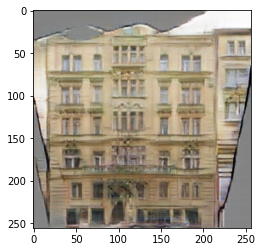

In [11]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/104_fake_B.png')
plt.imshow(img)

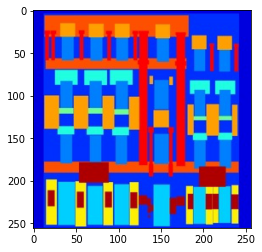

[Errno 99] Cannot assign requested address


In [12]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/4_fake_B.png')
plt.imshow(img)

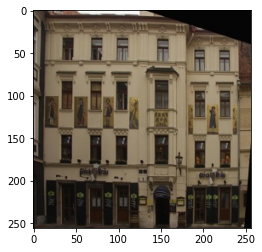

In [13]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
plt.imshow(img)